<a href="https://colab.research.google.com/github/itsjustdannyb/rock-paper-scissors-classifier/blob/main/rock_paper_scissors_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install -q tensorflow tensorflow-datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
## Tensorflow datasets
builder = tfds.list_builders()
builder

In [ ]:
## about the data
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

In [ ]:
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

In [ ]:
fig = tfds.show_examples(ds=ds_train, ds_info=info)

## Data Prep

In [10]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])


In [12]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


(2520, 300, 300)
(2520,)
(372, 300, 300)
(372,)


In [11]:
# convert test and train data from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print(train_images.dtype)
print(test_images.dtype)


float32
float32


In [13]:
# rescale image data
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
# # encode labels
# train_labels = tf.one_hot(train_labels, depth=3)
# test_labels = tf.one_hot(test_labels, depth=3)

In [ ]:

# train_labels.reshape(-1,1)

In [14]:
train_labels.shape

(2520,)

In [ ]:
# # reshape images
# train_images = train_images.reshape(2520, 300, 300, 1)
# test_images = test_images.reshape(372, 300, 300, 1)

# train_images.dtype #uint8
# # convert from uint8 to float
# train_images = train_images.astype('float32')
# test_images = test_images.astype('float32')

# train_images.dtype

In [ ]:
# # rescale image data
# train_images = train_images / 255
# test_images = test_images / 255

In [29]:
# train_images

## Train a Basic Network

In [45]:
opt = tf.keras.optimizers.legacy.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()

In [16]:
# model = Sequential([
#     Flatten(),
#     Dense(units = 620, activation='relu'),
#     Dense(units=256, activation='relu'),
#     Dense(3, activation='softmax')
# ])

# opt = tf.keras.optimizers.Adam()
# loss = tf.keras.losses.SparseCategoricalCrossentropy()
# acc = tf.keras.metrics.Accuracy()

# model.compile(
#     optimizer=opt,
#     loss=loss,
#     metrics=[acc]
# )



model = Sequential([
    Flatten(input_shape=(300, 300, )),
    Dense(units = 620, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(3, activation='softmax')
])

opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc]
)


In [17]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose = 1, validation_split=0.2)

Epoch 1/10
63/63 [==============================] - 4s 29ms/step - loss: 21.6159 - sparse_categorical_accuracy: 0.4206 - val_loss: 1.5079 - val_sparse_categorical_accuracy: 0.6290
Epoch 2/10
63/63 [==============================] - 2s 25ms/step - loss: 2.1446 - sparse_categorical_accuracy: 0.6528 - val_loss: 1.1858 - val_sparse_categorical_accuracy: 0.7103
Epoch 3/10
63/63 [==============================] - 2s 29ms/step - loss: 1.3030 - sparse_categorical_accuracy: 0.7272 - val_loss: 3.4265 - val_sparse_categorical_accuracy: 0.4583
Epoch 4/10
63/63 [==============================] - 2s 27ms/step - loss: 0.7399 - sparse_categorical_accuracy: 0.7991 - val_loss: 0.1509 - val_sparse_categorical_accuracy: 0.9544
Epoch 5/10
63/63 [==============================] - 2s 24ms/step - loss: 1.0953 - sparse_categorical_accuracy: 0.7812 - val_loss: 0.1444 - val_sparse_categorical_accuracy: 0.9683
Epoch 6/10
63/63 [==============================] - 2s 24ms/step - loss: 0.3493 - sparse_categorical_acc

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 620)               55800620  
                                                                 
 dense_1 (Dense)             (None, 256)               158976    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 55960367 (213.47 MB)
Trainable params: 55960367 (213.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
import pandas as pd
history = pd.DataFrame(history.history)

In [20]:
history

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,21.615892,0.420635,1.507905,0.628968
1,2.144630,0.652778,1.185843,0.710317
2,1.303019,0.727183,3.426533,0.458333
3,0.739900,0.799107,0.150874,0.954365
4,1.095260,0.781250,0.144357,0.968254
5,0.349332,0.883433,0.160176,0.936508
6,0.366086,0.882440,0.224209,0.932540
7,0.197482,0.932540,0.551566,0.823413
8,0.609500,0.821429,0.083149,0.968254
9,0.578833,0.861111,0.265817,0.880952


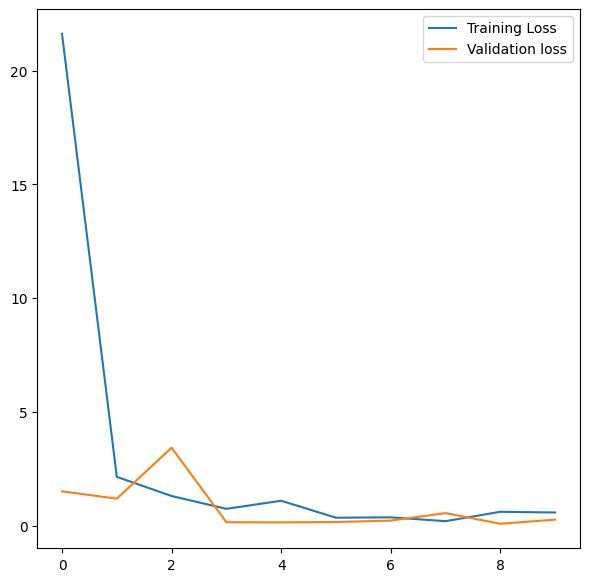

In [21]:
plt.figure(figsize=(7,7))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.legend()

In [22]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 2.0740 - sparse_categorical_accuracy: 0.5538


[2.07399320602417, 0.5537634491920471]

# the model doesn't generalize well

# CNN implementation

In [59]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dropout

In [69]:
opt = tf.keras.optimizers.legacy.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()

In [72]:
cnn_model = Sequential([
    AveragePooling2D(6, 3, input_shape=(300,300,1)),
    Conv2D(64, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(
    optimizer=opt,
    loss = loss,
    metrics=['accuracy']
)

In [73]:
train_images.shape

(2520, 300, 300)

In [40]:
 print("Trainable Variables")
for variable in cnn_model.trainable_variables:
  print(variable.name)

Trainable Variables
conv2d_18/kernel:0
conv2d_18/bias:0
conv2d_19/kernel:0
conv2d_19/bias:0
conv2d_20/kernel:0
conv2d_20/bias:0
dense_15/kernel:0
dense_15/bias:0
dense_16/kernel:0
dense_16/bias:0


In [38]:
len(cnn_model.trainable_variables)

10

In [71]:
history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 361, in accuracy  **
        y_true.shape.assert_is_compatible_with(y_pred.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [52]:
cnn_hist = history.history
cnn_hist = pd.DataFrame(cnn_hist)

In [53]:
cnn_hist

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.098599,0.341837,1.098792,0.313492
1,1.098643,0.341837,1.098835,0.313492
2,1.098510,0.341837,1.099140,0.313492
3,1.098532,0.341837,1.099460,0.313492
4,1.098527,0.341837,1.099530,0.313492
5,1.098549,0.341837,1.099658,0.313492
6,1.098526,0.341837,1.099634,0.313492
7,1.098595,0.341837,1.099697,0.313492
8,1.098522,0.341837,1.099592,0.313492
9,1.098526,0.341837,1.099509,0.313492


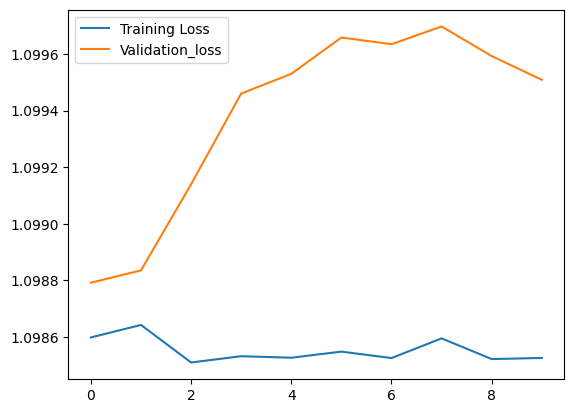

In [57]:
cnn_hist['loss'].plot(kind='line', label='Training Loss')
cnn_hist['val_loss'].plot(kind='line', label='Validation_loss')
plt.legend()

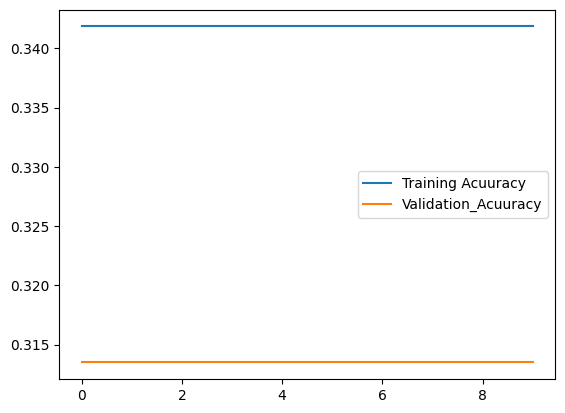

In [58]:
cnn_hist['sparse_categorical_accuracy'].plot(kind='line', label='Training Acuuracy')
cnn_hist['val_sparse_categorical_accuracy'].plot(kind='line', label='Validation_Acuuracy')
plt.legend()